# Генерация систем непрерывных и дискретных случайных величин

1. Написать программу реализующую метод формирования двумерной НСВ с
определенным распределением (согласно варианту). Выполнить статистическое
исследование (построение гистограммы составляющих вектора, вычислить точечные
и интервальные оценки, коэффициент корреляции и другое). Проверить гипотезы о
соответствии полученных оценок характеристик (математическое ожидание,
дисперсия, корреляция) случайной величины теоретическим.  



In [1]:
import numpy as np
from sympy import *
import matplotlib
import pylab
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
%matplotlib inline 

np.random.seed(42)
x, y, z, t = symbols('x y z t')

$$f(x,y) = \frac{3*\sin(x+y)}{4} $$

In [2]:
def Probability_density(x, y):
    return 3*np.sin(x+y)/4

## Двумерная НСВ

### Получение $f(y)$ и $g(y)$
Для получения функция распределения $f(y)$ проинтегрируем $f(x, y)$ по $x$
$$f(y) = \frac{3}{4}\int_0^\infty \mathrm{sin(x+y)}\mathrm{d}x$$

In [3]:
integrate(3/4*sin(x+y), (x, 0, oo))

AccumBounds(-0.75, 0.75) + 0.75*cos(y)

In [4]:
def f_y_star(y):
    return 3/4*np.cos(y)

Мы получили функцию $f(y)=0.75*cos(y)$. Проинтегрировав ее мы получим плотность распределения
$$F(y)= \frac{3}{4}\int_0^\infty \mathrm{cos(y)}\mathrm{d}y$$
и ищем обратную 
$$g(y)= F(y)^{-1}$$  

In [5]:
integrate(3/4*cos(y))#, (y, -oo, np.pi/2))

0.75*sin(y)

Таким образом мы выяснили, что функция распределения для случайной величины $y$: $F(y)=0.75*sin(y)$, а обратная ей функция $$g(y)=\frac{4}{3}*\arcsin(y)$$

In [6]:
def y_inverted(y):
    return np.arcsin(y)/0.75

Согласно свойству функции расприедления, случайные величины, полученные с помощью функции $g(y)$ будут иметь распределение, соотвутствующее функции, заданой по условию.

### Получение $f(x)$ и $g(x)$ 
Чтобы избежать погрешности в случае если x и y зависимы $f(x)$ будем искать как: 
$$ f(x)=\frac{f(x,y)}{f(y)}$$

In [7]:
#integrate(3/4*sin(x)*cos(y) + 3/4*sin(y)*cos(x), (x, 0, oo))

In [8]:
def f_x_star(x,y):
    return (3*np.sin(x+y)/4)/y

In [9]:
y_gen = np.random.random_sample()
#x = y = np.random.random_sample()
y_output = float(f_y_star(y_gen))

In [10]:
const = float("%.3f" % (3/(4*y_output)))
y_output = float("%.3f" % y_output) #обрезаем лишнее символы после запятой

integrate(const*sin(x+y_output))

-1.074*cos(x + 0.698)

проинтегрируем эту функцию - получаем обратную 
$$g(x)= F(x)^{-1}$$  
$$\arccos{(x-0.698)}/1.074 $$

In [11]:
def x_inverted(x):
    return np.arccos(x - 0.698)/1.074

Таким образом, мы получили функции для генерации x и y

### Генерация случайных величин:

In [12]:
def generationOfContinuousRV(n):
    continuity_array = np.zeros((n,2))

    for i in range(n):
        #for j in range(2):
        x = np.random.random_sample()
        y = np.random.random_sample()
        #print(y_inverted(y), x_inverted(x))
        continuity_array[i,0] = y_inverted(y)
        continuity_array[i,1] = x_inverted(x)
    return continuity_array

In [13]:
#print(continuity_array)

## Двумерная ДСВ

2. Написать программу реализующую метод формирования двумерной ДСВ. Выполнить
статистическое исследование (построение эмпирической матрицы распределения,
гистограммы составляющих вектора, вычислить точечные и интервальные оценки,
коэффициент корреляции). Проверить гипотезы о соответствии закона распределения
полученной случайной величины требуемому. Проверить гипотезы о соответствии
полученных оценок характеристик (математическое ожидание, дисперсия,
корреляция) случайной величины теоретическим

Генерирум матрицу, сумма по столбцам и строкам в которой равна единице

In [14]:
size_discrete = 5
d = np.random.dirichlet(np.ones(size_discrete*size_discrete))
print(d)

[0.13798461 0.0603599  0.04184948 0.00777564 0.00777433 0.00274302
 0.09219525 0.04213092 0.05644076 0.00095344 0.16060382 0.08189031
 0.01094149 0.00919917 0.00928775 0.01662871 0.03410181 0.02592434
 0.01577926 0.04338184 0.00688678 0.0158385  0.02091584 0.0279137
 0.07049931]


In [15]:
np.sum(d)

0.9999999999999999

Генерирум массивы x и y, которые и будут нашими выходными случайными числами

In [16]:
x_discrete = np.zeros((size_discrete))
y_discrete = np.zeros((size_discrete))

for i in range(size_discrete):
    repeated = True
    while(repeated):
        x = np.random.randint(1,10)
        if x not in x_discrete: 
            x_discrete[i] = x
            repeated = False
        #else:
            #print(i, x, x_discrete)
            
    repeated = True
    while(repeated):
        y = np.random.randint(1,10)
        if y not in y_discrete: 
            y_discrete[i] = y
            repeated = False
        #print(i, y, y_discrete)
            
x_discrete = np.sort(x_discrete)
y_discrete = np.sort(y_discrete)
print(x_discrete, y_discrete)

[3. 4. 5. 7. 9.] [2. 3. 5. 7. 9.]


In [17]:
p_x = np.zeros((size_discrete))
accumulated_sum = 0

for i in range(size_discrete*size_discrete):
    accumulated_sum += d[i]
    if (i + 1) % (size_discrete) == 0 and i > 0:
        p_x[int(i / size_discrete)] = accumulated_sum
        accumulated_sum = 0

In [18]:
print(p_x)

[0.25574396 0.1944634  0.27192254 0.13581595 0.14205414]


In [19]:
f_x = np.zeros((size_discrete))
accumulated_sum = 0
for i in range(size_discrete):
    accumulated_sum += p_x[i]
    f_x[i] = accumulated_sum
    
f_x

array([0.25574396, 0.45020736, 0.7221299 , 0.85794586, 1.        ])

In [20]:
p_y = np.zeros((size_discrete,size_discrete))

for i in range(size_discrete):
    for j in range(size_discrete):
        p_y[i, j] = d[i*size_discrete + j]/p_x[i]

In [21]:
p_y

array([[0.539542  , 0.23601692, 0.1636382 , 0.030404  , 0.03039888],
       [0.01410559, 0.47410078, 0.21665219, 0.29023849, 0.00490295],
       [0.59062342, 0.30115308, 0.04023753, 0.0338301 , 0.03415587],
       [0.1224356 , 0.25108839, 0.19087845, 0.11618116, 0.31941639],
       [0.04847999, 0.11149625, 0.14723854, 0.1965004 , 0.49628482]])

In [22]:
f_y = np.zeros((size_discrete,size_discrete))
accumulated_sum = 0

for i in range(size_discrete):
    accumulated_sum = 0
    for j in range(size_discrete):
        accumulated_sum += p_y[i,j]
        f_y[i, j] = accumulated_sum
        
f_y

array([[0.539542  , 0.77555892, 0.93919712, 0.96960112, 1.        ],
       [0.01410559, 0.48820637, 0.70485856, 0.99509705, 1.        ],
       [0.59062342, 0.8917765 , 0.93201403, 0.96584413, 1.        ],
       [0.1224356 , 0.373524  , 0.56440245, 0.68058361, 1.        ],
       [0.04847999, 0.15997624, 0.30721478, 0.50371518, 1.        ]])

## generation itself

In [23]:
def generationOfDiscreteRV(n):
    discrete_array = np.zeros((n,2))

    j_saved = 0
    for i in range(n):
        x = np.random.random_sample()
        y = np.random.random_sample()   

        for j in range(size_discrete):
            if x < f_x[j]:
                #print(i, x, j,f_x[j], x_discrete[j])
                j_saved = j
                discrete_array[i,0] = x_discrete[j]
                break
            #else: print("smth got wrong with x")

        for j in range(size_discrete):
            if y < f_y[j_saved, j]:
                discrete_array[i,1] = y_discrete[j]
                #print(" ", y, j, f_y[j_saved, j], y_discrete[j])
                break
                
    return discrete_array


In [24]:
#print(x_discrete, y_discrete)

## Тестирование

In [25]:
n = 100000
continuous_arr = generationOfContinuousRV(n)
discrete_arr = generationOfDiscreteRV(n)

In [26]:
continuous_arr

array([[1.74381894, 1.22644449],
       [0.41271053, 1.35956564],
       [1.00473529, 2.06211113],
       ...,
       [0.2347803 , 2.03781396],
       [0.64475196, 2.13330226],
       [1.2720707 , 1.7361451 ]])

In [27]:
discrete_arr

array([[5., 2.],
       [7., 7.],
       [5., 5.],
       ...,
       [5., 2.],
       [9., 5.],
       [3., 5.]])

## ДСВ

In [28]:
def statDiscrete(arr, n, arr_x, arr_y, size_discrete):
    props = np.zeros((2, size_discrete))
    for i in range(n):
        for j in range(size_discrete):
            if arr[i,0] == arr_x[j]:
                props[0,j] +=1
                break
    
    for i in range(n):
        for j in range(size_discrete):
            if arr[i,1] == arr_y[j]:
                props[1,j] +=1
                break
    #print(props) 
    return props/n

In [58]:
def histDiscrete(props, arr, dim):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    rects1 = ax.bar(arr, props[dim], label="frequency")
    plt.show()
    
def expectedValueDiscrete(value, prop, dim):
    return np.dot(value[dim], prop)

def dispersionDiscrete(value, prop, expected_value, n):
    ex_val_powered = 0
    for i in range(n):
        ex_val_powered += np.power(value[i],1) * prop[i] 
    return ex_val_powered - np.power(expected_value, 2)

def correlationDiscrete(arr_x, arr_y, p, dispersion_x, dispersion_y):
    
    k = 0
    for i in range(len(arr_x)):
        for j in range(len(arr_y)):
            k =+ (arr_x[i]*arr_y[j]* p[i,j] )
    print("k=", k)
    c = k / np.power((dispersion_x * dispersion_y),1/2)
    print("c=", c)
    return c

In [59]:
props_discrete = statDiscrete(discrete_arr, n, x_discrete, y_discrete, size_discrete)
props_discrete

array([[0.25542, 0.19382, 0.27323, 0.13556, 0.14197],
       [0.32475, 0.2856 , 0.14275, 0.11544, 0.13146]])

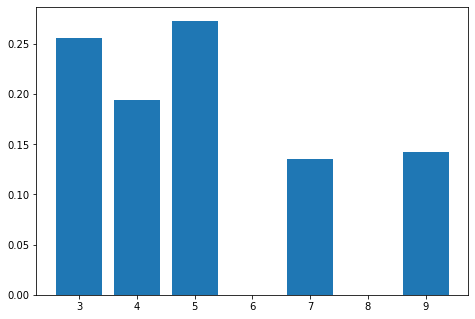

expected value x: 5.13434
dispersion x: -21.227107235600002


In [60]:
histDiscrete(props_discrete, x_discrete, 0)
expected_value_x = expectedValueDiscrete(props_discrete, x_discrete, 0)
dispersion_x = dispersionDiscrete(x_discrete, props_discrete[0], expected_value_x, size_discrete)
print("expected value x: " + str(expected_value_x))
print("dispersion x: " + str(dispersion_x))

In [61]:
print(np.median(x_discrete), np.std(x_discrete))


5.0 2.1540659228538015


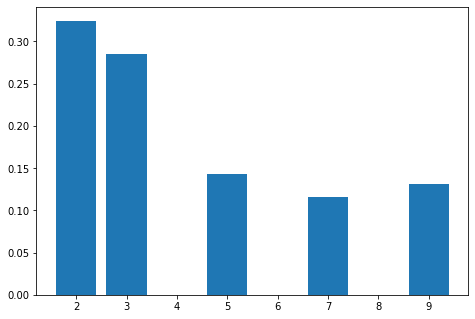

expected value y: 4.21127
dispersion y: -13.523525012899999


In [56]:
histDiscrete(props_discrete, y_discrete, 1)
expected_value_y = expectedValueDiscrete(props_discrete, y_discrete, 1)
dispersion_y = dispersionDiscrete(y_discrete, props_discrete[1], expected_value_y, size_discrete)
print("expected value y: " + str(expected_value_y))
print("dispersion y: " + str(dispersion_y))

In [57]:
print(np.median(y_discrete), np.std(y_discrete))

5.0 2.5612496949731396


In [35]:
correlationDiscrete(x_discrete, y_discrete, p_y, dispersion_x, dispersion_y)

k= 40.19907031088
c= 8.188547515475873


8.188547515475873

## НСВ

In [36]:
def plot3D(f, a, b):
    x = np.linspace(a, b, 100)
    y = np.linspace(a, b, 100)

    X, Y = np.meshgrid(x, y)
    Z = Probability_density(X, Y)
    fig = plt.figure()
    fig.set_figwidth(8)     
    fig.set_figheight(8)    
    ax = plt.axes(projection='3d')
    ax.plot_wireframe(X, Y, Z, color='black', rstride=10)
    plt.show()

In [37]:
def histDataPreparation(n, arr, step = 10):
    b = np.max(arr)
    a = 0
    intervals_num = step
    h = (b - a) / intervals_num
    
    #intervals = [(starts[i], ends[i]) for i in range(intervals_num)]
    
    
    interval_number = 0
    intervals = np.arange(a, b , h)#1/(step))
    print("intervals", intervals)
    intervals_stat = np.zeros((step ))
    arr_sorted = np.sort(arr)
    
    for counter in range(n):

        if interval_number < step - 1:
            if arr_sorted[counter] >= intervals[interval_number + 1]:
                #while (mm_method[counter] > intervals[interval_number]) and (interval_number < step - 1 ):
                interval_number += 1
                intervals_stat[interval_number] += 1
                continue
        else:
            intervals_stat[interval_number] += n - counter
            break

        if arr_sorted[counter] == intervals[interval_number]:
            intervals_stat[interval_number] += 0.5
            if interval_number > 0:
                intervals_stat[interval_number - 1] += 0.5
        elif (arr_sorted[counter] > intervals[interval_number]) and (arr_sorted[counter] < intervals[interval_number + 1]):
            intervals_stat[interval_number] += 1
        else:
            print("smth got wrong",  mm_method[counter], interval_number, intervals[interval_number])
            #wtf_counter +=1
            
    return intervals, intervals_stat

In [38]:
def buildHistogram(x, intervals_stat, step):
    width = 0.08
    _, ax = plt.subplots(figsize=(15,5))
    rects1 = ax.bar(x - width/2, intervals_stat, width, label="frequency")

    #ax.set_ylabel('cm')
    ax.set_xticks(x)
    ax.legend()
    plt.show()

In [39]:
def getParams(a, b, arr, n, var = x):
    x, y, z, t = symbols('x y z t')
    f = lambda x, y:   sin(x + y)
        
    
    f = integrate(f(x, y), (x if var == y else y, a, b))
    expected_value_theoretic = integrate(f * var, (var, a, b)).evalf()
    print("Theoretically expected value ", expected_value_theoretic)
        
    expected_value_practical = sum(arr) / n
    print("Practically expected value ", expected_value_practical)
    
    dispersion_theoretic = integrate (f * var * var, (var, a, b)).evalf() - expected_value_theoretic ** 2
    print("Theoretically expected dispersion", dispersion_theoretic)
    
    dispersion_practical = 0
    for i in range(n):
        dispersion_practical += np.power(arr[i], 2) - np.power(expected_value_practical,2)
    dispersion_practical = dispersion_practical/n
    print("Practically expected dispersion", dispersion_practical)

    return expected_value_practical, expected_value_theoretic, dispersion_practical, dispersion_theoretic

In [40]:
def practicalCorrelation(arr_x, arr_y, ex_value_x, ex_value_y, dispersion_x, dispersion_y, n):
    ex_value_x_y = sum([arr_x[i] * arr_y[i] for i in range(n)]) / n
    c = (ex_value_x_y - ex_value_x * ex_value_y) / ((dispersion_x * dispersion_y) ** (1/2))
    print("Practical correlation", c)
    
    
def theoreticCorrelation(a, b, ex_value_x, ex_value_y, dispersion_x, dispersion_y):  
    f = lambda x, y: 3 / 4 * sin(x + y)
    ex_value_x_y = integrate (f(x, y) * x * y, (x, a, b), (y, a, b)).evalf()
    
    c = (ex_value_x_y - ex_value_x * ex_value_y) / ((dispersion_x*dispersion_y) ** (1/2))
    print("Theoratical correlation", c)

In [41]:
continuity_array = generationOfContinuousRV(n)
continuity_array

array([[1.79312248, 1.29989379],
       [1.71052848, 1.75702959],
       [1.0209899 , 1.34809639],
       ...,
       [1.71654737, 1.99617916],
       [0.30404644, 1.49835766],
       [0.68725861, 1.68260311]])

In [42]:
f = lambda x, y: 3*np.sin(x + y)/4

a = 0
b = oo

min_a = 0
max_b = min(np.pi/2, b)
b = np.pi/2#float(min(b, max_b))

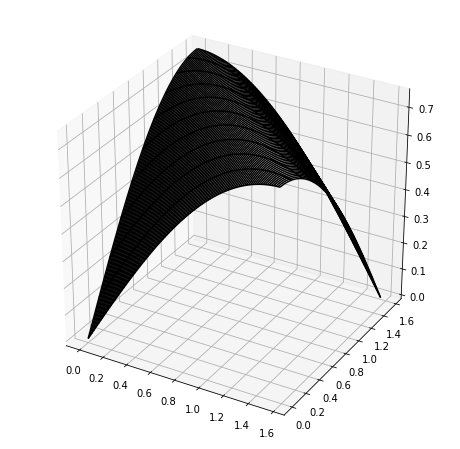

In [43]:
plot3D(f, a, b)

In [44]:
continuity_x = np.sort([couple[0] for couple in continuity_array])
continuity_y = np.sort([couple[1] for couple in continuity_array])    

intervals [0.         0.20919473 0.41838947 0.6275842  0.83677893 1.04597366
 1.2551684  1.46436313 1.67355786 1.88275259]


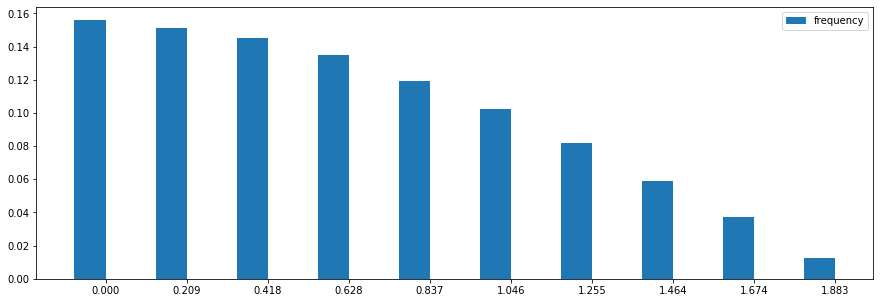

In [45]:
step = 10

intervals, intervals_stat_x = histDataPreparation(n, continuity_x, step)
buildHistogram(intervals,intervals_stat_x/n, step)

In [46]:
x, y, z, t = symbols('x y z t')

In [47]:
expected_value_practical_x, expected_value_theoretic_x, dispersion_practical_x, dispersion_theoretic_x = getParams(a, b,continuity_x, n, x)

Theoretically expected value  1.57079632679490
Practically expected value  0.7610431582372601
Theoretically expected dispersion -0.858407346410207
Practically expected dispersion 0.25084665337447065


**lets explore y**

intervals [0.         0.21819333 0.43638666 0.65457999 0.87277332 1.09096665
 1.30915998 1.52735331 1.74554664 1.96373997]


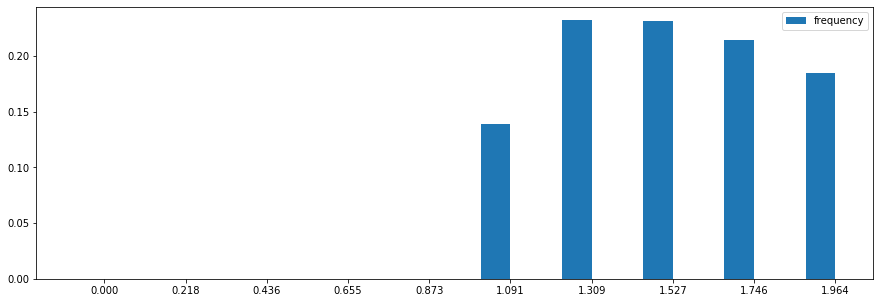

In [48]:
intervals, intervals_stat_y = histDataPreparation(n, continuity_y, step)
buildHistogram(intervals,intervals_stat_y/n, step)

In [49]:
expected_value_practical_y, expected_value_theoretic_y, dispersion_practical_y, dispersion_theoretic_y= getParams(a, b, continuity_y, n, y)

Theoretically expected value  1.57079632679490
Practically expected value  1.6571613046461413
Theoretically expected dispersion -0.858407346410207
Practically expected dispersion 0.08019944404817757


In [50]:
practicalCorrelation(continuity_x, continuity_y, expected_value_practical_x, expected_value_practical_y, dispersion_practical_x, dispersion_practical_y, n)

Practical correlation 0.9924636514814126


In [51]:
theoreticCorrelation(a, b, expected_value_theoretic_x, expected_value_theoretic_y,  dispersion_theoretic_x,  dispersion_theoretic_y)    

Theoratical correlation -1.87697206555598
